# IBM Data Science Professional Certification

## Capstone Project

##### Analyze and utilize Machine Learning Unsupervised Clustering techniques to cluster the housing areas into different groups based on various factores. Using Foursquare API to explore the venues around each housing area to provide detailed solutions and recommendations to the dataset. (Pandas, Numpy, matplotlib, scikit-learn, folium, Foursquare API, Kaggle) 

### A. Introduction

#### 1) Introduction and Background Discussion
Ontario is Canada’s second-largest province by area, covering more than one million square kilometers. The province is located in central Canada; it is bordered by Quebec to the east, Manitoba to the west, and the Great Lakes making up a part of its southern border with the United States. Ontario covers all types of landscapes, from the forested Canadian Shield, southern fertile farmland, and over 250,000 lakes. Moreover, Ottawa is Canada’s capital, in the east of southern Ontario, near the city of Montréal and the U.S. Ontario is a very diverse province. For example, 54.8% of the population of Toronto was born outside Canada, which is the second-largest percentage of immigrants in a single city on Earth. 

Ontario has a very diverse and inclusive environment which is a new home for many international people. It is important for newcomers to familiarize themselves with the community and settle down with convenience. This analysis is providing those newcomers with details about housing prices and venues around to find the best accommodations that will perfectly suit them. 

The main factors and criteria that will be considered in this project are 'Housing Prices' and 'Good Amenities'. Analysis of housing price will provide newcomers a big picture and general idea of the range of the price and see the comparisons between different areas in Ontario. Good amenities will ensure the newcomers have the access to what they need including restaurants, cafes, gyms, libraries, grocery stores, and so on. 

#### 2) Data Description 
The dataset regarding the housing prices in Ontarios is from Kaggle dataset - House Sales in Ontario. This is a .csv file that includes the listing prices for the sale of properties (mostly houses) in Ontario. The dataset includes the following fields: 
   * Price in dollars
   * Address of the property
   * Latitude and Longitude of the address obtained by using Google Geocoding service
   * Area Name of the property obtained by using Google Geocoding service

In total, there are around 23500 houses in this dataset that will be cleaned and analyzed. 

In additional to the housing price dataset, Foursquare API will be used to get the most common venues in Ontario. For example, the data will help in determine the unique types and quantity of venues across different areas in Ontario. This data set is essential in segmenting and clustering the different neighbourhoods inside Ontario. 

### B. Methodology and Data Exploration

In [37]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing Datasets

In [ ]:
# Read in the csv file
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

In [161]:
# @hidden_cell

def __iter__(self): return 0


# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a3e9b3d180a04544aea282eb80eba380 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='m8SFo8Gq0VpwP639h86Th9QZ7K2yAg0ndCUolddviq7D',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_a3e9b3d180a04544aea282eb80eba380.get_object(Bucket='ibmdatasciencecapstoneproject-donotdelete-pr-nwsgmfxt5ipf4w',Key='properties.csv')['Body']


In [160]:
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118


In [15]:
# Check the columns
df.columns

Index(['Unnamed: 0', 'Address', 'AreaName', 'Price ($)', 'lat', 'lng'], dtype='object')

In [16]:
#Changing some Column Names
df.rename(columns={'Unnamed: 0': 'ID', 'Price ($)': 'Price'}, inplace=True)
df.columns

Index(['ID', 'Address', 'AreaName', 'Price', 'lat', 'lng'], dtype='object')

In [17]:
# Check the shape of the dataset
df.shape

(25351, 6)

In [18]:
# Describe the dataset
df.describe()

,ID,Price,lat,lng
count,25351.000000,2.535100e+04,25351.000000,25351.000000
mean,42878.517613,5.645438e+05,37.326614,-85.218379
std,31456.247046,8.475962e+05,82.858347,73.093572
min,0.000000,0.000000e+00,-999.000000,-999.000000
25%,19940.000000,2.199000e+05,43.401087,-80.308159
50%,34037.000000,3.719000e+05,43.715977,-79.503342
75%,61501.500000,6.199000e+05,44.466711,-79.107326
max,124929.000000,3.250000e+07,53.851017,1.074519


#### Data Cleaning 

In [20]:
#Eliminating houses with invalid lat and lng
df = df[(df['lat'] != -999 ) & (df['lng'] != -999)]
df.shape

(25190, 6)

In [21]:
#Eliminating houses with price <= 100000
df = df[(df['Price'] >= 100000)]
df.shape

(22554, 6)

In [23]:
# Parse the address and create a city column
df['City'] = df['Address'].str.replace(', ON','')
df['City'] = df['City'].str.split(' ').str.get(-1)
df.head()

,ID,Address,AreaName,Price,lat,lng,City
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266,Toronto
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396,Hamilton
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357,Hamilton
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403,Hamilton
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118,Toronto


In [65]:
# Remove areas that only have a few houses
df = df.groupby(['City']).filter(lambda x: len(x) > 10)

# Get the Average Price for a city
AvePrice = df.groupby(['City']).mean()

print(AvePrice.head(10))
print("The highest Average Price is ", AvePrice.Price.max())
AvePrice.shape

                       ID         Price        lat        lng
City                                                         
Ajax         69967.425532  6.873267e+05  43.864750 -79.029704
Amherstburg  50121.000000  3.942098e+05  42.113603 -83.096762
Ancaster     29460.260870  1.183809e+06  43.217432 -79.974832
Angus        54665.875000  4.003062e+05  44.319832 -79.862096
Arnprior     66019.652174  2.918087e+05  45.425271 -76.355406
Bancroft     88827.022727  3.201636e+05  45.055056 -77.846676
Barrie       36785.875000  8.330957e+05  44.380661 -79.682989
Bay          66786.650485  2.719221e+05  46.558469 -80.796626
Bayfield     51760.136364  4.393273e+05  43.560892 -81.699303
Beach        61650.600000  4.231592e+05  43.196524 -78.631381
The highest Average Price is  1941998.8863636365


(152, 4)

#### Which area have higher amount of houses on sale?

This provides the newcomers an idea of the amount of available houses in each area

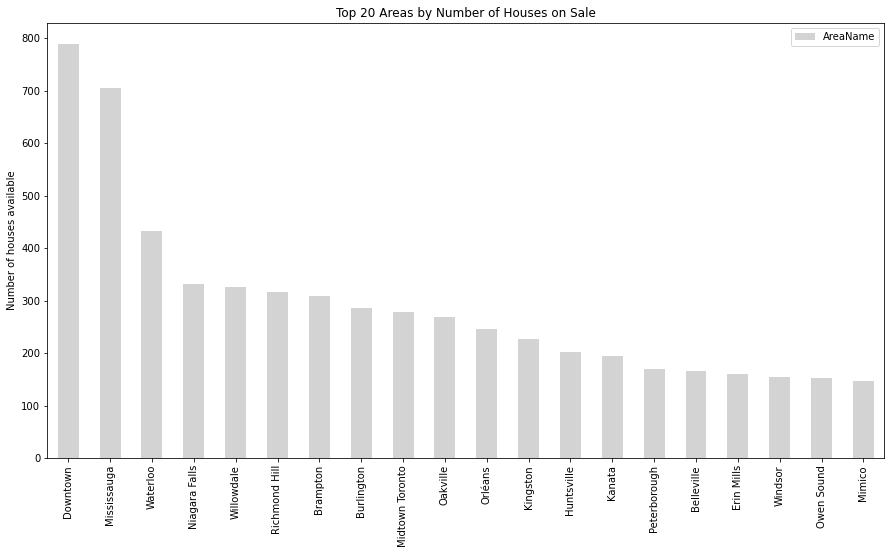

In [57]:
# Creating a TOP 20 Rank by area 
# Visualizing using Bar Charts
quantity = pd.DataFrame(df['AreaName'].value_counts())
quantity.sort_values(by='AreaName')
quantity[0:20].plot(kind='bar', color='lightgrey', figsize=(15, 8))
plt.title('Top 20 Areas by Number of Houses on Sale')
plt.ylabel('Number of houses available')
plt.show()

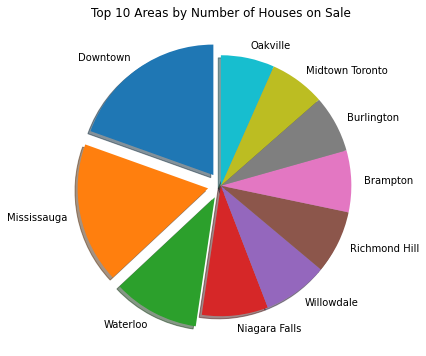

In [59]:
# Visualizing using Pie Charts
explode_list = [0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0] # ratio for each continent with which to offset each wedge.
quantity.AreaName[0:10].plot(kind='pie',
                            figsize=(15, 6),
                            startangle=90,    
                            shadow=True,       
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            explode=explode_list # 'explode' lowest 3 continents
                            )
plt.title('Top 10 Areas by Number of Houses on Sale')
plt.ylabel('')
plt.show()

#### Which area have the most expensive houses on sale ?

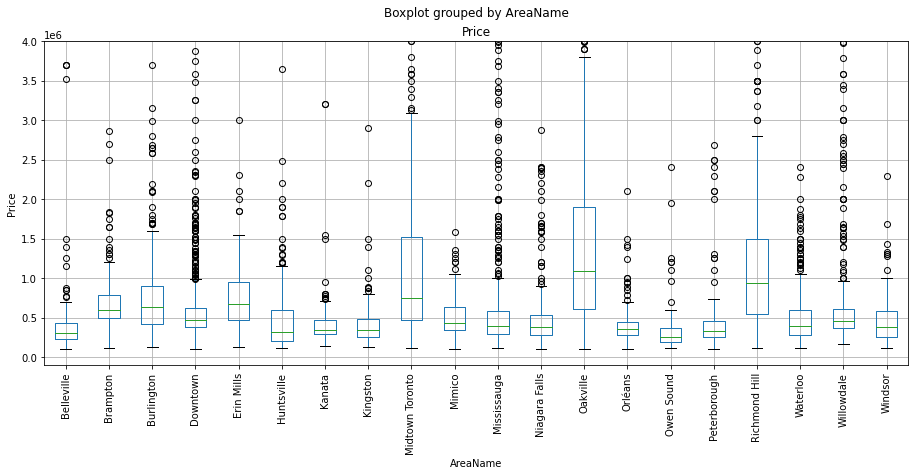

In [69]:
topAreasNames = list(quantity[0:20].index)
area = df[df['AreaName'].isin(topAreasNames)]
box_ax = area.boxplot(column='Price', by='AreaName', rot=90, grid=True, figsize=(15, 6))
box_ax.set_ylim(-1e5, 4e6)
plt.ylabel('Price')

plt.show()

#### Which area have the highest average price?

Text(0, 0.5, 'Price')

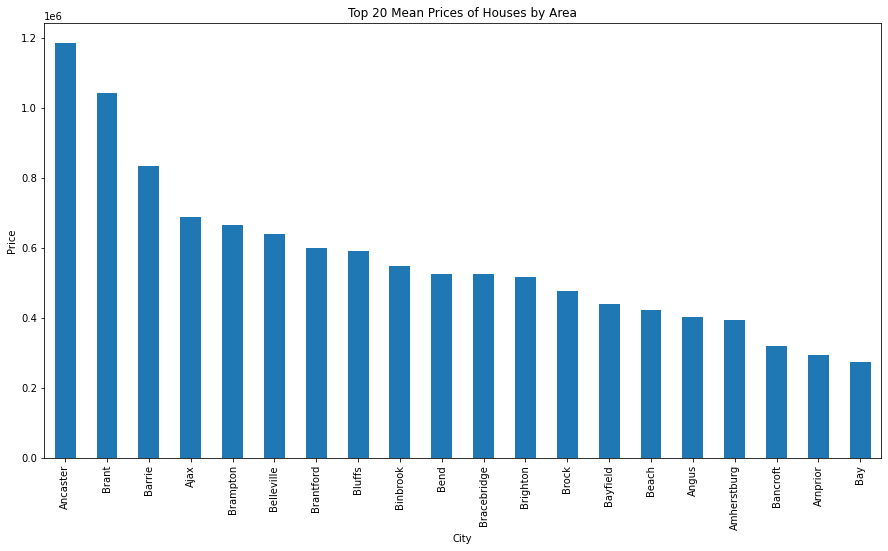

In [74]:
# Average Price by Area(Top 20)
topMean = AvePrice[0:20].sort_values(by='Price', axis=0, ascending=False)
topMeanPrices = topMean.Price
topMeanPrices.plot(kind='bar', figsize=(15, 8))

plt.title('Top 20 Mean Prices of Houses by Area')
plt.ylabel('Price')

#### Map visualization of the houses

In [76]:
!pip install folium
import folium # map rendering library

     |████████████████████████████████| 94 kB 6.6 MB/s  eta 0:00:01


In [91]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [77]:
df.head()

,ID,Address,AreaName,Price,lat,lng,City
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266,Toronto
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396,Hamilton
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357,Hamilton
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403,Hamilton
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118,Toronto


In [79]:
# create map of New York using latitude and longitude values
map_general = folium.Map(location=[43.651070,  -79.347015], zoom_start=10)

df_selected = df.sample(n=100)

# add markers to map
for lat, lng, price, area in zip(df_selected['lat'], df_selected['lng'], df_selected['Price'], df_selected['City']):
    label = '{}, {}'.format(area, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_general)  
    
map_general

In [85]:
# Simplify to only Toronto Area
toronto_data = df[df['City'] == 'Toronto'].reset_index(drop=True).sample(n=200)

toronto_data.head()

,ID,Address,AreaName,Price,lat,lng,City
1019,5915,"4609 Kingston Rd Toronto, ON",West Hill,588000,43.774265,-79.181625,Toronto
102,422,"712 BROCK AVE Toronto, ON",Wallace Emerson,939000,43.661915,-79.439941,Toronto
1987,34991,"77 Dentonia Park Ave Toronto, ON",Old East York,415000,43.692848,-79.292099,Toronto
73,178,"592 The Queensway Toronto, ON",The Queensway,699900,43.628426,-79.493980,Toronto
1352,6257,"#310 - 777 STEELES AVE W Toronto, ON",Newtonbrook,395000,43.792667,-79.443939,Toronto


In [86]:
map_toronto = folium.Map(location=[43.651070,  -79.347015], zoom_start=13)

# add markers to map
for lat, lng, label in zip(toronto_data['lat'], toronto_data['lng'], toronto_data['AreaName']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Define Foursquare Credentials and Version

In [87]:
# @hidden_cell
CLIENT_ID = 'BSC3YRBI1IAF15ZG1CZIHW2UUWNGMOCXM4BE5DIEVWGFV5FM' # your Foursquare ID
CLIENT_SECRET = 'VQO1JJBNHL54MZTMJJS3BMTPN3DOOYZ0HOMGER5ZFLD0HGRZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BSC3YRBI1IAF15ZG1CZIHW2UUWNGMOCXM4BE5DIEVWGFV5FM
CLIENT_SECRET:VQO1JJBNHL54MZTMJJS3BMTPN3DOOYZ0HOMGER5ZFLD0HGRZ


In [88]:
## Create a function to repeat the same process to all the neighborhoods in Manhattan
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['AreaName', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [92]:
toronto_venues = getNearbyVenues(names=toronto_data['AreaName'], 
                                 latitudes = toronto_data['lat'], 
                                 longitudes = toronto_data['lng'])

### Check the size of the resuting dataframe
print(toronto_venues.shape)
toronto_venues.head()

West Hill
Wallace Emerson
Old East York
The Queensway
Newtonbrook
Tam O'Shanter
Eringate - Centennial - West Deane
Willowdale
Henry Farm
Downtown
King West Village
Midtown Toronto
Malvern
Willowdale
Downtown
Niagara
Milliken
Bridlewood
Mount Dennis
Midtown Toronto
Downtown
Leslieville
Niagara
Rouge
Riverdale
Malvern
Downtown
Milliken
Humber Bay
Mount Dennis
Alderwood
Downtown
Downsview
Midtown Toronto
Willowdale
Rexdale
Downtown
York University Heights
North Toronto
Willowdale
Davisville
Downtown
Emery
Malvern
Markham
Downtown
Dovercourt Park
Willowdale
Humber Bay Shores
Downtown
Silverthorn
Willowdale
Mount Dennis
Downtown
Lansing
Downtown
Rouge
Newtonbrook
Scarborough Junction
Bayview Village
Pelmo Park
Bathurst Manor
Niagara
Downtown
Downtown
Mimico
North Toronto
Toronto
Malvern
Woburn
Agincourt
Brockton Village
Alderwood
Downtown
Mimico
Midtown Toronto
Bathurst Manor
Cliffcrest
Little Portugal
Downtown
Leaside
Downtown
Bayview Village
Henry Farm
Mimico
Downsview
Midtown Toronto
Swa

,AreaName,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,West Hill,43.774265,-79.181625,LCBO,43.771462,-79.184384,Liquor Store
1,West Hill,43.774265,-79.181625,Bulk Barn,43.771342,-79.184341,Food & Drink Shop
2,West Hill,43.774265,-79.181625,Sunset Grill,43.772319,-79.184900,Breakfast Spot
3,West Hill,43.774265,-79.181625,Booster Juice,43.770668,-79.184150,Smoothie Shop
4,West Hill,43.774265,-79.181625,Subway,43.771832,-79.185109,Sandwich Place


In [94]:
# Check how many venues were returned for each neighborhood
toronto_venues.groupby('AreaName').count()

# Find out unique categories 
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 303 uniques categories.


### Analyze each Area

In [95]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['AreaName'] = toronto_venues['AreaName'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

### Group rows by neighborhood and take mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('AreaName').mean().reset_index()
toronto_grouped

,AreaName,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.046875,0.000000,...,0.000,0.0,0.031250,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000
1,Alderwood,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000
2,Bathurst Manor,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000
3,Bayview Village,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000
4,Bendale,0.0,0.0,0.0250,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.025,0.0,0.000000,0.0,0.0,0.0,0.0,0.025000,0.025,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Willowdale,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.006237,0.008316,...,0.000,0.0,0.016632,0.0,0.0,0.0,0.0,0.012474,0.000,0.006237
71,Wilson Heights,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000
72,Woburn,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.030303,0.000,0.060606
73,Woodbine Gardens,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000


### Print each Area Name along with the top 5 most common venues

In [96]:
num_top_venues = 5

for hood in toronto_grouped['AreaName']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['AreaName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                    venue  freq
0  Furniture / Home Store  0.09
1            Dessert Shop  0.06
2      Chinese Restaurant  0.06
3              Restaurant  0.06
4             Men's Store  0.06


----Alderwood----
                       venue  freq
0             Discount Store  0.10
1                Pizza Place  0.10
2         Light Rail Station  0.10
3               Camera Store  0.05
4  South American Restaurant  0.05


----Bathurst Manor----
                 venue  freq
0                 Park  0.12
1          Men's Store  0.12
2                  Bar  0.06
3  American Restaurant  0.06
4          Bus Station  0.06


----Bayview Village----
            venue  freq
0     Coffee Shop  0.10
1  Clothing Store  0.07
2            Café  0.07
3            Bank  0.04
4        Pharmacy  0.04


----Bendale----
            venue  freq
0  Clothing Store  0.15
1  Sandwich Place  0.06
2  Cosmetics Shop  0.05
3    Intersection  0.04
4     Coffee Shop  0.04


----Black Creek----
       

                  venue  freq
0           Pizza Place  0.25
1           Gas Station  0.12
2           Coffee Shop  0.12
3        Clothing Store  0.12
4  Gym / Fitness Center  0.12


----Rexdale----
                                      venue  freq
0                               Pizza Place  0.15
1  Residential Building (Apartment / Condo)  0.08
2                            Breakfast Spot  0.08
3                               Coffee Shop  0.08
4                               Gas Station  0.08


----Riverdale----
                   venue  freq
0                   Café  0.18
1  Vietnamese Restaurant  0.18
2            Coffee Shop  0.07
3      French Restaurant  0.07
4                 Bistro  0.07


----Roncesvalles Village----
                   venue  freq
0            Coffee Shop  0.10
1             Restaurant  0.07
2                   Café  0.05
3  Vietnamese Restaurant  0.05
4                Brewery  0.05


----Rouge----
                  venue  freq
0          Intersection  0.23
1  

### Put all the information into Panda Dataframe

In [116]:
# Write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['AreaName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['AreaName'] = toronto_grouped['AreaName']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,AreaName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Furniture / Home Store,Men's Store,Dessert Shop,Restaurant,Chinese Restaurant,Japanese Restaurant,Bubble Tea Shop,Shopping Mall,Arts & Crafts Store,Hotel
1,Alderwood,Discount Store,Pizza Place,Light Rail Station,Burrito Place,Convenience Store,Grocery Store,Shopping Mall,Skating Rink,Sandwich Place,Park
2,Bathurst Manor,Park,Men's Store,Escape Room,Bus Line,French Restaurant,Gas Station,Metro Station,Coffee Shop,Baseball Field,Bar
3,Bayview Village,Coffee Shop,Café,Clothing Store,Pharmacy,Chinese Restaurant,Bank,Furniture / Home Store,Gourmet Shop,Thai Restaurant,Gift Shop
4,Bendale,Clothing Store,Sandwich Place,Cosmetics Shop,Intersection,Fish & Chips Shop,Coffee Shop,Bus Station,Bar,Food Court,Movie Theater


### Cluster the Areas

In [134]:
### Run k-means to cluster into 7 clusters
# set number of clusters
kclusters = 7

toronto_grouped_clustering = toronto_grouped.drop('AreaName', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

### create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels
# neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('AreaName'), on='AreaName')
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].fillna(1)
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)

toronto_merged.head() # check the columns!

,ID,Address,AreaName,Price,lat,lng,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1019,5915,"4609 Kingston Rd Toronto, ON",West Hill,588000,43.774265,-79.181625,Toronto,5,Breakfast Spot,Automotive Shop,Discount Store,Liquor Store,Sandwich Place,Food & Drink Shop,Asian Restaurant,Athletics & Sports,Greek Restaurant,Chinese Restaurant
102,422,"712 BROCK AVE Toronto, ON",Wallace Emerson,939000,43.661915,-79.439941,Toronto,5,Café,Bar,Bakery,Mexican Restaurant,Caribbean Restaurant,Cocktail Bar,Coffee Shop,Sandwich Place,Diner,Pizza Place
1987,34991,"77 Dentonia Park Ave Toronto, ON",Old East York,415000,43.692848,-79.292099,Toronto,5,Ice Cream Shop,Convenience Store,Gym,Paper / Office Supplies Store,Park,Metro Station,Gas Station,Bank,Chinese Restaurant,Beer Store
73,178,"592 The Queensway Toronto, ON",The Queensway,699900,43.628426,-79.493980,Toronto,1,Italian Restaurant,Coffee Shop,Flower Shop,Park,Ice Cream Shop,Bank,Eastern European Restaurant,Fish Market,Fast Food Restaurant,Field
1352,6257,"#310 - 777 STEELES AVE W Toronto, ON",Newtonbrook,395000,43.792667,-79.443939,Toronto,5,Coffee Shop,Park,Bank,Chinese Restaurant,Korean Restaurant,Middle Eastern Restaurant,Discount Store,Grocery Store,Café,Food Court


### C. Results Section

#### Visualize the Clusters
Visualize the clusters using folium. The dataset is being divided into 7 clusters using the KMeans method

In [137]:
### Visualize
# create map
map_clusters = folium.Map(location=[43.651070,  -79.347015], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['lat'], toronto_merged['lng'], toronto_merged['AreaName'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Each Cluster

#### Cluster 1

In [142]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(7, toronto_merged.shape[1]))]]

,Address,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2047,"49 JOHN TABOR TR Toronto, ON",0,Fast Food Restaurant,Pizza Place,Pharmacy,Park,Grocery Store,Bubble Tea Shop,Supermarket,Convenience Store,Sandwich Place,Gym / Fitness Center
2496,"#101 - 99 BLACKWELL AVE Toronto, ON",0,Fast Food Restaurant,Pizza Place,Pharmacy,Park,Grocery Store,Bubble Tea Shop,Supermarket,Convenience Store,Sandwich Place,Gym / Fitness Center
3092,"9 Norman Wesley Way Toronto, ON",0,Grocery Store,Pizza Place,Recreation Center,Pharmacy,Café,Furniture / Home Store,Metro Station,Coffee Shop,Park,Escape Room
1360,"#405 - 99 BLACKWELL AVE Toronto, ON",0,Fast Food Restaurant,Pizza Place,Pharmacy,Park,Grocery Store,Bubble Tea Shop,Supermarket,Convenience Store,Sandwich Place,Gym / Fitness Center
2910,"#54 - 42 Pinery Tr Toronto, ON",0,Fast Food Restaurant,Pizza Place,Pharmacy,Park,Grocery Store,Bubble Tea Shop,Supermarket,Convenience Store,Sandwich Place,Gym / Fitness Center
3146,"#Ph09 - 1060 SHEPPARD AVE W Toronto, ON",0,Grocery Store,Pizza Place,Recreation Center,Pharmacy,Café,Furniture / Home Store,Metro Station,Coffee Shop,Park,Escape Room
3282,"100 Pennyhill Dr Toronto, ON",0,Fast Food Restaurant,Pizza Place,Pharmacy,Park,Grocery Store,Bubble Tea Shop,Supermarket,Convenience Store,Sandwich Place,Gym / Fitness Center
4315,"#1921 - 5 SHEPPARD AVE Toronto, ON",0,Pizza Place,Grocery Store,Coffee Shop,Ice Cream Shop,Spa,Vietnamese Restaurant,Fast Food Restaurant,Cosmetics Shop,Pharmacy,Sandwich Place
3280,"#214 - 430 Mclevin Ave Toronto, ON",0,Fast Food Restaurant,Pizza Place,Pharmacy,Park,Grocery Store,Bubble Tea Shop,Supermarket,Convenience Store,Sandwich Place,Gym / Fitness Center
4755,"124 BARSE ST Toronto, ON",0,Pizza Place,Bagel Shop,Coffee Shop,Bakery,Ice Cream Shop,Chinese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Convenience Store,Grocery Store


#### Cluster 2

In [141]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(7, toronto_merged.shape[1]))]]

,Address,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
73,"592 The Queensway Toronto, ON",1,Italian Restaurant,Coffee Shop,Flower Shop,Park,Ice Cream Shop,Bank,Eastern European Restaurant,Fish Market,Fast Food Restaurant,Field
1022,"#201 - 56 Sidney Belsey Cres Toronto, ON",1,Pizza Place,Bus Line,Fast Food Restaurant,Park,Ice Cream Shop,Asian Restaurant,Coffee Shop,Convenience Store,Yoga Studio,Field
3341,"47 Braymore Blvd Toronto, ON",1,Intersection,Bus Station,Park,Fast Food Restaurant,Gas Station,Pizza Place,Food Truck,Food Stand,Food Court,Food & Drink Shop
1582,"39 Victoria Blvd Toronto, ON",1,Pizza Place,Bus Line,Fast Food Restaurant,Park,Ice Cream Shop,Asian Restaurant,Coffee Shop,Convenience Store,Yoga Studio,Field
3735,"#4 - 24 Martin Ross Ave Toronto, ON",1,Park,Café,Furniture / Home Store,Grocery Store,Escape Room,Sporting Goods Shop,Supermarket,Middle Eastern Restaurant,Metro Station,Shopping Mall
1214,"#3008 - 16 Brookers Lane Toronto, ON",1,Italian Restaurant,Grocery Store,Building,Pet Store,Furniture / Home Store,Smoothie Shop,Sushi Restaurant,Field,Park,Liquor Store
4454,"#2307 - 75 Emmett Ave Toronto, ON",1,Pizza Place,Bus Line,Fast Food Restaurant,Park,Ice Cream Shop,Asian Restaurant,Coffee Shop,Convenience Store,Yoga Studio,Field
407,"9 Red River Cres Toronto, ON",1,Intersection,Bus Station,Park,Fast Food Restaurant,Gas Station,Pizza Place,Food Truck,Food Stand,Food Court,Food & Drink Shop
4152,"10 RANWOOD DR Toronto, ON",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1800,"#911 - 1030 SHEPPARD AVE W Toronto, ON",1,Park,Men's Store,Escape Room,Bus Line,French Restaurant,Gas Station,Metro Station,Coffee Shop,Baseball Field,Bar


#### Cluster 3

In [143]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Address,lng,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2397,"79 CHAPMAN AVE Toronto, ON",-79.297798,Toronto,2,Pet Store,Health & Beauty Service,Theater,Chinese Restaurant,Yoga Studio,Falafel Restaurant,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop


#### Cluster 4

In [144]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Address,lng,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1533,"10 Flora Dr Toronto, ON",-79.281387,Toronto,3,Bowling Alley,Outdoor Sculpture,Yoga Studio,Food,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop


#### Cluster 5

In [146]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Address,lng,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2675,"14 STONG CRT Toronto, ON",-79.516373,Toronto,4,Liquor Store,Grocery Store,Athletics & Sports,French Restaurant,Flea Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market


#### Cluster 6

In [147]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Address,lng,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1019,"4609 Kingston Rd Toronto, ON",-79.181625,Toronto,5,Breakfast Spot,Automotive Shop,Discount Store,Liquor Store,Sandwich Place,Food & Drink Shop,Asian Restaurant,Athletics & Sports,Greek Restaurant,Chinese Restaurant
102,"712 BROCK AVE Toronto, ON",-79.439941,Toronto,5,Café,Bar,Bakery,Mexican Restaurant,Caribbean Restaurant,Cocktail Bar,Coffee Shop,Sandwich Place,Diner,Pizza Place
1987,"77 Dentonia Park Ave Toronto, ON",-79.292099,Toronto,5,Ice Cream Shop,Convenience Store,Gym,Paper / Office Supplies Store,Park,Metro Station,Gas Station,Bank,Chinese Restaurant,Beer Store
1352,"#310 - 777 STEELES AVE W Toronto, ON",-79.443939,Toronto,5,Coffee Shop,Park,Bank,Chinese Restaurant,Korean Restaurant,Middle Eastern Restaurant,Discount Store,Grocery Store,Café,Food Court
4670,"#301 - 185 BONIS AVE Toronto, ON",-79.292114,Toronto,5,Fast Food Restaurant,Intersection,Market,Beer Store,Coffee Shop,Liquor Store,Bank,Sandwich Place,Pet Store,Pharmacy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,"#2111 - 290 ADELAIDE ST W Toronto, ON",-79.390945,Toronto,5,Coffee Shop,Café,Restaurant,Japanese Restaurant,Hotel,Italian Restaurant,Park,Grocery Store,Pizza Place,Sushi Restaurant
2049,"23 CANDY COURT WAY Toronto, ON",-79.445152,Toronto,5,Coffee Shop,Park,Bank,Chinese Restaurant,Korean Restaurant,Middle Eastern Restaurant,Discount Store,Grocery Store,Café,Food Court
1915,"#112 - 363 SORAUREN AVE W Toronto, ON",-79.444771,Toronto,5,Coffee Shop,Restaurant,Brewery,Vietnamese Restaurant,Café,Breakfast Spot,Bookstore,Park,Gift Shop,Fish Market
4436,"#530 - 2 EVA RD Toronto, ON",-79.563148,Toronto,5,Convenience Store,Sushi Restaurant,Intersection,Turkish Restaurant,Fish & Chips Shop,Skating Rink,Chinese Restaurant,Farmers Market,Tapas Restaurant,Sandwich Place


#### Cluster 7

In [150]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Address,lng,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1514,"8 Firestone Rd Toronto, ON",-79.576218,Toronto,6,Garden,Park,Eastern European Restaurant,Yoga Studio,Flower Shop,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market
1449,"##1008 - 420 Mill Rd Toronto, ON",-79.588692,Toronto,6,Garden,Park,Eastern European Restaurant,Yoga Studio,Flower Shop,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market


### Visualize the House Price using map

In [154]:
import folium

map_price = folium.Map(location=[43.651070,  -79.347015], zoom_start=8) 

# Get the highest average house price
maxave = int(AvePrice['Price'].max())
print("Highest City House Price is: ", maxave)

# Create a color map to match house prices. White - low price, Black - high price
colormap = ['white','lightgray','pink','lightred','orange','darkred','red','purple','darkpurple','black']

# Add marker info 
for index, row in AvePrice.iterrows(): 
    # Set icon color based on price
    theCol = colormap[ int((len(colormap) - 1 ) *  float( row['Price']) / maxave) ]
    # Create a marker text with City name and average price
    markerText =  str(index) + ' ${:,.0f}'.format(row['Price'])
    
    folium.Marker([row['lat'],row['lng']], popup = markerText, 
                  icon=folium.Icon(color= theCol)).add_to(map_price)

map_price

Highest City House Price is:  1941998


### Combine the Cluster and the House Price Map

In [158]:
### Visualize
# create map
map_final = folium.Map(location=[43.651070,  -79.347015], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['lat'], toronto_merged['lng'], toronto_merged['AreaName'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_final)
    
# Add marker info 
for index, row in AvePrice.iterrows(): 
    # Set icon color based on price
    theCol = colormap[ int((len(colormap) - 1 ) *  float( row['Price']) / maxave) ]
    # Create a marker text with City name and average price
    markerText =  str(index) + ' ${:,.0f}'.format(row['Price'])
    
    folium.Marker([row['lat'],row['lng']], popup = markerText, 
                  icon=folium.Icon(color= theCol)).add_to(map_final)
       
map_final

### D. Discussion